In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import re
import socket
import struct
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [387]:
fraud_data = pd.read_csv('D:/Week8$9/data/Fraud_Data.csv')
ip_data = pd.read_csv('D:/Week8$9/data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('D:/Week8$9/data/creditcard.csv')

In [388]:
# Check for missing values
print(fraud_data.isnull().sum())


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [389]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)

# Correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

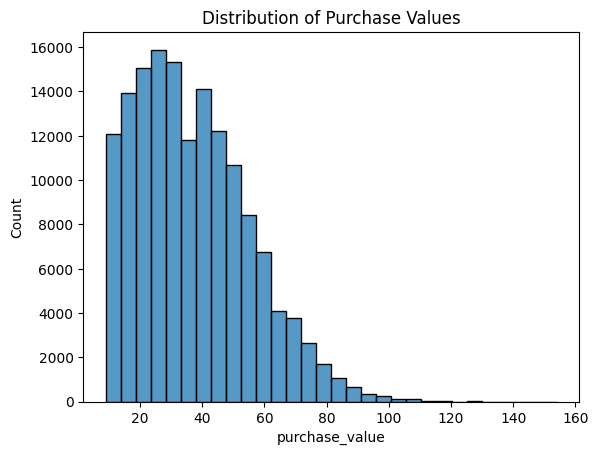

In [390]:
# Plotting the distribution of purchase values
sns.histplot(fraud_data['purchase_value'], bins=30)
plt.title('Distribution of Purchase Values')
plt.show()

In [391]:
# Check data types of each column
print(fraud_data.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


In [392]:
# Convert IP addresses to integer format
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))


In [393]:
# Select only numeric columns for correlation analysis
numeric_data = fraud_data.select_dtypes(include=['float64', 'int64'])

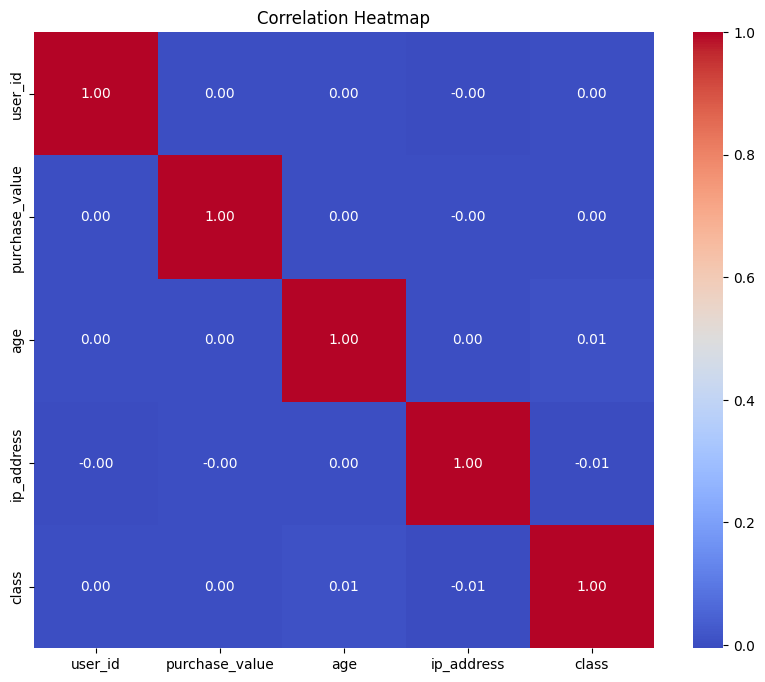

In [394]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [395]:
# Check the shape of each dataset
print("\nShapes of the datasets:")
print(f"Fraud Data: {fraud_data.shape}")
print(f"IP Address Data: {ip_data.shape}")
print(f"Credit Card Data: {creditcard_data.shape}")


Shapes of the datasets:
Fraud Data: (151112, 11)
IP Address Data: (138846, 3)
Credit Card Data: (284807, 31)


In [396]:
# Check for missing values in the ip_address column
print(f"Missing values in fraud_data['ip_address']: {fraud_data['ip_address'].isnull().sum()}")
print(f"Missing values in ip_data['lower_bound_ip_address']: {ip_data['lower_bound_ip_address'].isnull().sum()}")
print(f"Missing values in ip_data['upper_bound_ip_address']: {ip_data['upper_bound_ip_address'].isnull().sum()}")

Missing values in fraud_data['ip_address']: 0
Missing values in ip_data['lower_bound_ip_address']: 0
Missing values in ip_data['upper_bound_ip_address']: 0


In [397]:
# Check data types of the relevant columns
print("Data types:")
print(fraud_data['ip_address'].dtype)
print(ip_data['lower_bound_ip_address'].dtype)
print(ip_data['upper_bound_ip_address'].dtype)

# Sample some values from the IP address columns
print("\nSample values from fraud_data['ip_address']:")
print(fraud_data['ip_address'].sample(10).values)

print("\nSample values from ip_data['lower_bound_ip_address']:")
print(ip_data['lower_bound_ip_address'].sample(10).values)

print("\nSample values from ip_data['upper_bound_ip_address']:")
print(ip_data['upper_bound_ip_address'].sample(10).values)

Data types:
float64
float64
int64

Sample values from fraud_data['ip_address']:
[2.55977192e+09 1.40865842e+09 1.47894883e+09 3.97689250e+09
 5.12612815e+08 1.39480249e+09 1.02090816e+09 1.61791532e+09
 1.45688955e+09 2.20263517e+09]

Sample values from ip_data['lower_bound_ip_address']:
[2.96055194e+09 2.23136358e+09 3.26222797e+09 3.22206234e+09
 3.23730688e+09 1.54116966e+09 1.54084762e+09 3.28840064e+09
 3.23108762e+09 3.51757926e+09]

Sample values from ip_data['upper_bound_ip_address']:
[2374686719 1541031935 1728844799 3409901311 3229899007 3428453375
 2212321279 3285321727 3005898751 3225783807]


In [398]:

# Function to convert integer to IP address
def int_to_ip(num):
    return '.'.join(str((num >> (8 * i)) & 0xFF) for i in reversed(range(4)))

# Convert the fraud_data IP addresses to valid strings
fraud_data['ip_address'] = fraud_data['ip_address'].astype(float).astype(int).apply(int_to_ip)

# Convert ip_data lower and upper bounds to valid strings
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(float).astype(int).apply(int_to_ip)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(float).astype(int).apply(int_to_ip)

# Check the results
print("\nConverted fraud_data IP addresses:")
print(fraud_data['ip_address'].sample(10).values)

print("\nConverted ip_data lower_bound_ip_addresses:")
print(ip_data['lower_bound_ip_address'].sample(10).values)

print("\nConverted ip_data upper_bound_ip_addresses:")
print(ip_data['upper_bound_ip_address'].sample(10).values)

# Now convert IP addresses back to integer format for further processing
fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)
ip_data['lower_bound_ip_int'] = ip_data['lower_bound_ip_address'].apply(ip_to_int)
ip_data['upper_bound_ip_int'] = ip_data['upper_bound_ip_address'].apply(ip_to_int)


Converted fraud_data IP addresses:
['142.179.183.168' '242.173.232.28' '177.63.118.121' '36.144.11.151'
 '64.119.157.63' '104.222.22.14' '193.108.80.162' '176.146.90.41'
 '59.38.81.104' '127.233.248.193']

Converted ip_data lower_bound_ip_addresses:
['37.221.224.0' '91.237.192.0' '203.5.213.0' '198.206.173.0' '192.42.51.0'
 '192.154.94.0' '84.43.0.0' '64.150.168.0' '200.29.176.0' '165.252.0.0']

Converted ip_data upper_bound_ip_addresses:
['154.36.255.255' '162.246.119.255' '179.63.183.255' '193.188.47.255'
 '109.205.135.255' '193.57.17.255' '69.65.191.255' '202.63.251.255'
 '217.29.191.255' '80.241.63.255']


In [399]:
# Function to convert IP address back to integer
def ip_to_int(ip):
    return sum(int(x) << (8 * i) for i, x in enumerate(reversed(ip.split('.'))))

# Convert IP addresses back to integer format for further processing
fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)
ip_data['lower_bound_ip_int'] = ip_data['lower_bound_ip_address'].apply(ip_to_int)
ip_data['upper_bound_ip_int'] = ip_data['upper_bound_ip_address'].apply(ip_to_int)

In [400]:
# Merge datasets based on the IP address integer range
merged_data = fraud_data.merge(
    ip_data,
    how='left',
    left_on='ip_int',
    right_on='lower_bound_ip_int'
)

# Filter to ensure the IP falls within the bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_int']) & 
                           (merged_data['ip_int'] <= merged_data['upper_bound_ip_int'])]

In [401]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_ip_int,upper_bound_ip_int
24727,99475,2015-01-15 22:52:56,2015-03-21 05:26:58,55,KKQVQFEISXTQI,Ads,IE,M,25,204.209.167.0,0,3436291840,204.209.167.0,204.209.167.255,Canada,3.436292e+09,3.436292e+09
32485,39268,2015-05-09 17:42:56,2015-06-04 05:13:18,36,LVTPXQBECONJX,SEO,IE,F,27,194.33.14.0,0,3256946176,194.33.14.0,194.33.14.255,Romania,3.256946e+09,3.256946e+09
35932,92325,2015-01-16 19:47:30,2015-05-03 17:19:26,27,IYIBXBGTIDAUY,Direct,Chrome,M,30,208.88.184.0,0,3495475200,208.88.184.0,208.88.191.255,Canada,3.495475e+09,3.495477e+09
37431,390559,2015-07-09 06:36:13,2015-09-22 04:07:00,51,SKNQFVNNGMSXY,Ads,Safari,M,24,96.40.0.0,0,1613234176,96.40.0.0,96.41.255.255,United States,1.613234e+09,1.613365e+09
52243,383733,2015-04-09 12:13:47,2015-07-22 23:48:13,42,PFHACSCWDLWUA,SEO,Chrome,F,45,206.197.207.0,0,3469070080,206.197.207.0,206.197.207.255,United States,3.469070e+09,3.469070e+09


 Transaction Frequency

In [402]:
# Assuming 'user_id' is the identifier for users and 'purchase_time' is the timestamp of transactions
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Calculate transaction frequency
transaction_frequency = fraud_data.groupby('user_id')['purchase_time'].count().reset_index(name='transaction_frequency')

# Merge back to the main DataFrame
fraud_data = fraud_data.merge(transaction_frequency, on='user_id', how='left')

 Transaction Velocity

In [403]:
# Calculate velocity
transaction_velocity = fraud_data.groupby('user_id')['purchase_time'].agg(['min', 'max']).reset_index()
transaction_velocity['velocity'] = (transaction_velocity['max'] - transaction_velocity['min']).dt.total_seconds()

# Merge back to the main DataFrame
fraud_data = fraud_data.merge(transaction_velocity[['user_id', 'velocity']], on='user_id', how='left')

 Time-Based Features

In [404]:
# Extract hour of the day and day of the week
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

 Normalization and Scaling

In [405]:


# Specify the numerical columns you want to scale
numerical_columns = ['transaction_frequency', 'velocity', 'hour_of_day']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the columns
fraud_data[numerical_columns] = scaler.fit_transform(fraud_data[numerical_columns])

In [406]:
print(merged_data.columns.tolist())

['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'country', 'lower_bound_ip_int', 'upper_bound_ip_int']


In [407]:


# Calculate transaction frequency
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

# Calculate transaction velocity
transaction_velocity = fraud_data.groupby('user_id')['purchase_time'].agg(['min', 'max']).reset_index()
transaction_velocity['velocity'] = (transaction_velocity['max'] - transaction_velocity['min']).dt.total_seconds()
fraud_data = fraud_data.merge(transaction_velocity[['user_id', 'velocity']], on='user_id', how='left')

# Create hour_of_day feature
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour

# Now you can check the columns again
print(fraud_data.columns.tolist())

['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'ip_int', 'transaction_frequency', 'velocity_x', 'hour_of_day', 'day_of_week', 'velocity_y']


In [408]:
# Check the unique values in the velocity columns
print(fraud_data[['velocity_x', 'velocity_y']].describe())

# If you decide to keep only one of them, for example, velocity_x:
fraud_data['velocity'] = fraud_data['velocity_x']  # or use velocity_y based on your analysis
fraud_data.drop(columns=['velocity_x', 'velocity_y'], inplace=True)  # Remove the extra columns if needed

# Check the updated columns
print(fraud_data.columns.tolist())

       velocity_x  velocity_y
count    151112.0    151112.0
mean          0.0         0.0
std           0.0         0.0
min           0.0         0.0
25%           0.0         0.0
50%           0.0         0.0
75%           0.0         0.0
max           0.0         0.0
['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class', 'ip_int', 'transaction_frequency', 'hour_of_day', 'day_of_week', 'velocity']


In [409]:
# Define the numerical columns (including the resolved velocity)
numerical_columns = ['transaction_frequency', 'hour_of_day', 'velocity']

# Initialize the scaler
standard_scaler = StandardScaler()

# Fit and transform the numerical columns
fraud_data[numerical_columns] = standard_scaler.fit_transform(fraud_data[numerical_columns])

TASK 2

In [410]:

# Load the datasets
fraud_data = pd.read_csv('D:/Week8$9/data/Fraud_Data.csv')
credit_card_data = pd.read_csv('D:/Week8$9/data/creditcard.csv')

# Separate features and target for Fraud Data
X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

# Separate features and target for Credit Card Data
X_credit_card = credit_card_data.drop(columns=['Class'])
y_credit_card = credit_card_data['Class']

In [411]:
# Split the Fraud Data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

# Split the Credit Card Data
X_credit_card_train, X_credit_card_test, y_credit_card_train, y_credit_card_test = train_test_split(
    X_credit_card, y_credit_card, test_size=0.2, random_state=42, stratify=y_credit_card
)